In [ ]:
import argparse
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from numpy import genfromtxt
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
scaler = StandardScaler()
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn import metrics
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
import sys
import os
from sklearn import tree, ensemble
from sklearn.metrics import roc_auc_score

## European Group

In [ ]:
with open('./eur/pv_0.05.ptrain.raw','r') as f:
    ftrain_eur = f.read().split('\n')

FileNotFoundError: ignored

In [ ]:
with open('./eur/trainYRI.pheno','r') as f:
    ytrain_eur = f.read().split('\n')

In [ ]:
with open('./eur/pv_0.05.ptest.raw','r') as f:
    ftest_eur = f.read().split('\n')

In [ ]:
with open('./eur/testYRI.pheno','r') as f:
    ytest_eur = f.read().split('\n')

In [ ]:
columns_eur = ftrain_eur[0].split()
cols_test_eur = ftest_eur[0].split()
all_data_eur = [i.split() for i in ftrain_eur[1:-1]]
all_data_test_eur = [i.split() for i in ftest_eur[1:-1]]

In [ ]:
def prep(data,cols):
    all_info = []
    for el in data:
        dict_d = {}
        for i, colname in enumerate(cols):
            dict_d[colname] = el[i]
        all_info.append(dict_d)
    return pd.DataFrame(all_info)

In [ ]:
final_eur = prep(all_data_eur, columns_eur)
final_test_eur = prep(all_data_test_eur, cols_test_eur)

In [ ]:
targets_eur = []
for el in ytrain_eur[1:-1]:
    targets_eur.append(el.split()[-1])

In [ ]:
targets_test_eur = []
for el in ytest_eur[1:-1]:
    targets_test_eur.append(el.split()[-1])

In [ ]:
final_eur['target'] = targets_eur
final_test_eur['target'] = targets_test_eur
final_eur = final_eur.drop(['FID', 'IID', 'PAT', 'MAT', 'SEX','PHENOTYPE'], axis=1)
final_test_eur = final_test_eur.drop(['FID', 'IID', 'PAT', 'MAT', 'SEX','PHENOTYPE'], axis=1)
final_train_eur = final_eur

## African Group

In [ ]:
with open('./afr/pv_0.05.ptrain.raw','r') as f:
    ftrain_afr = f.read().split('\n')

In [ ]:
with open('./afr/trainYRI.pheno','r') as f:
    ytrain_afr = f.read().split('\n')

In [ ]:
with open('./afr/pv_0.05.ptest.raw','r') as f:
    ftest_afr = f.read().split('\n')

In [ ]:
with open('./afr/testYRI.pheno','r') as f:
    ytest_afr = f.read().split('\n')

In [ ]:
columns_afr = ftrain_afr[0].split()
cols_test_afr = ftest_afr[0].split()
all_data_afr = [i.split() for i in ftrain_afr[1:-1]]
all_data_test_afr = [i.split() for i in ftest_afr[1:-1]]

In [ ]:
def prep(data,cols):
    all_info = []
    for el in data:
        dict_d = {}
        for i, colname in enumerate(cols):
            dict_d[colname] = el[i]
        all_info.append(dict_d)
    return pd.DataFrame(all_info)

In [ ]:
final_afr = prep(all_data_afr, columns_afr)
final_test_afr = prep(all_data_test_afr, cols_test_afr)

In [ ]:
targets_afr = []
for el in ytrain_afr[1:-1]:
    targets_afr.append(el.split()[-1])

In [ ]:
targets_test_afr = []
for el in ytest_afr[1:-1]:
    targets_test_afr.append(el.split()[-1])

In [ ]:
final_afr['target'] = targets_afr
final_test_afr['target'] = targets_test_afr
final_afr = final_afr.drop(['FID', 'IID', 'PAT', 'MAT', 'SEX','PHENOTYPE'], axis=1)
final_test_afr = final_test_afr.drop(['FID', 'IID', 'PAT', 'MAT', 'SEX','PHENOTYPE'], axis=1)
final_train_afr = final_afr

## Asian Group

In [ ]:
with open('./asn/pv_0.05.ptrain.raw','r') as f:
    ftrain_asn = f.read().split('\n')

In [ ]:
with open('./asn/trainYRI.pheno','r') as f:
    ytrain_asn = f.read().split('\n')

In [ ]:
with open('./asn/pv_0.05.ptest.raw','r') as f:
    ftest_asn = f.read().split('\n')

In [ ]:
with open('./asn/testYRI.pheno','r') as f:
    ytest_asn = f.read().split('\n')

In [ ]:
columns_asn = ftrain_asn[0].split()
cols_test_asn = ftest_asn[0].split()
all_data_asn = [i.split() for i in ftrain_asn[1:-1]]
all_data_test_asn = [i.split() for i in ftest_asn[1:-1]]

In [ ]:
def prep(data,cols):
    all_info = []
    for el in data:
        dict_d = {}
        for i, colname in enumerate(cols):
            dict_d[colname] = el[i]
        all_info.append(dict_d)
    return pd.DataFrame(all_info)

In [ ]:
final_asn = prep(all_data_asn, columns_asn)
final_test_asn = prep(all_data_test_asn, cols_test_asn)

In [ ]:
targets_asn = []
for el in ytrain_asn[1:-1]:
    targets_asn.append(el.split()[-1])

In [ ]:
targets_test_asn = []
for el in ytest_asn[1:-1]:
    targets_test_asn.append(el.split()[-1])

In [ ]:
final_asn['target'] = targets_asn
final_test_asn['target'] = targets_test_asn
final_asn = final_asn.drop(['FID', 'IID', 'PAT', 'MAT', 'SEX','PHENOTYPE'], axis=1)
final_test_asn = final_test_asn.drop(['FID', 'IID', 'PAT', 'MAT', 'SEX','PHENOTYPE'], axis=1)
final_train_asn = final_asn

## Filtering

In [ ]:
a = list(final_train_asn.columns)

In [ ]:
b = list(final_train_eur.columns)

In [ ]:
c = list(final_train_afr.columns)

In [ ]:
common_snps = list(set(a) & set(b) & set(c))


In [ ]:
final_train_eur

,SNP_8_2,SNP_19_2,SNP_32_2,SNP_40_2,SNP_50_2,SNP_64_2,SNP_73_2,SNP_92_2,SNP_104_2,SNP_105_2,...,SNP_4882_2,SNP_4891_2,SNP_4895_2,SNP_4910_2,SNP_4918_2,SNP_4920_2,SNP_4938_2,SNP_4963_2,SNP_4991_2,target
0,0,0,1,1,1,0,0,0,1,0,...,0,1,0,1,0,0,0,1,0,1
1,0,0,0,0,0,1,0,0,1,0,...,0,1,0,1,1,0,0,1,0,1
2,0,0,0,1,0,0,0,0,2,0,...,1,0,0,1,0,0,0,0,0,1
3,0,1,1,2,1,0,0,0,2,0,...,0,0,1,0,0,0,0,1,0,1
4,1,0,0,0,1,1,1,0,0,1,...,1,0,0,1,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2245,0,0,1,0,1,0,0,0,1,2,...,1,0,0,0,1,0,0,1,0,1
2246,0,0,0,1,0,1,1,0,1,1,...,0,0,0,0,1,1,0,1,0,0
2247,0,1,0,1,0,1,0,0,2,0,...,0,1,0,1,0,1,0,1,0,0
2248,0,0,0,1,0,0,1,1,0,0,...,0,1,0,0,0,1,0,0,1,0


In [ ]:
final_train_eur = final_train_eur[common_snps]
final_test_eur = final_test_eur[common_snps]

In [ ]:
final_train_afr = final_train_afr[common_snps]
final_test_afr = final_test_afr[common_snps]

In [ ]:
final_train_asn = final_train_asn[common_snps]
final_test_asn = final_test_asn[common_snps]

In [ ]:
X_eur = final_train_eur.drop(['target'], axis=1)
y_eur = final_train_eur.target
X_test_eur = final_test_eur.drop(['target'], axis=1)
y_test_eur = final_test_eur.target

In [ ]:
X_afr = final_train_afr.drop(['target'], axis=1)
y_afr = final_train_afr.target
X_test_afr = final_test_afr.drop(['target'], axis=1)
y_test_afr = final_test_afr.target

In [ ]:
X_asn = final_train_asn.drop(['target'], axis=1)
y_asn = final_train_asn.target
X_test_asn = final_test_asn.drop(['target'], axis=1)
y_test_asn = final_test_asn.target

## One-to-one

### European to European

In [ ]:
dict_acc = {}
dict_roc = {}

In [ ]:
from sklearn.linear_model import LogisticRegression

clf_eur = LogisticRegression(random_state=0).fit(X_eur, y_eur)
y_pred_eur = clf_eur.predict(X_test_eur)

In [ ]:
print('Accuracy score: ', accuracy_score(y_test_eur, y_pred_eur))

Accuracy score:  0.6173333333333333


In [ ]:
dict_acc['eur_eur'] =  accuracy_score(y_test_eur, y_pred_eur)

In [ ]:
from sklearn.metrics import roc_auc_score
print('ROC AUC score: ', roc_auc_score(y_test_eur, clf_eur.predict_proba(X_test_eur)[:, 1]))

ROC AUC score:  0.6580462838390957


In [ ]:
dict_roc['eur_eur'] = roc_auc_score(y_test_eur, clf_eur.predict_proba(X_test_eur)[:, 1])

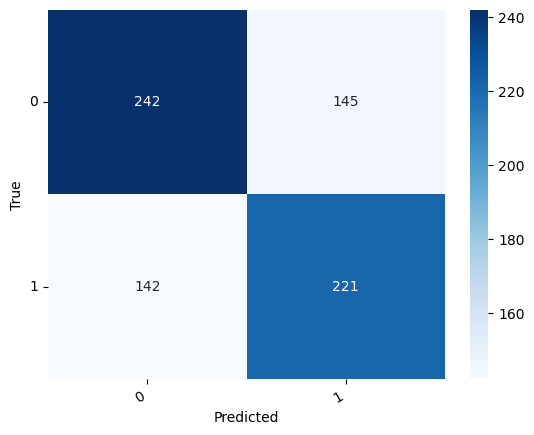

In [ ]:
def show_confusion_matrix(confusion_matrix):
    hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
    hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
    hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
    plt.ylabel('True')
    plt.xlabel('Predicted');

cm = confusion_matrix(y_test_eur, y_pred_eur)
df_cm = pd.DataFrame(cm, index=[0,1], columns=[0,1])
show_confusion_matrix(df_cm)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_eur, y_pred_eur, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.63      0.63      0.63       387
           1       0.60      0.61      0.61       363

    accuracy                           0.62       750
   macro avg       0.62      0.62      0.62       750
weighted avg       0.62      0.62      0.62       750



### European to African

In [ ]:
y_pred_afr = clf_eur.predict(X_test_afr)

In [ ]:
print('Accuracy score: ', accuracy_score(y_test_afr, y_pred_afr))

Accuracy score:  0.6573333333333333


In [ ]:
dict_acc['eur_afr'] =  accuracy_score(y_test_afr, y_pred_afr)

In [ ]:
from sklearn.metrics import roc_auc_score
print('ROC AUC score: ', roc_auc_score(y_test_afr, clf_eur.predict_proba(X_test_afr)[:, 1]))

ROC AUC score:  0.7059177015967493


In [ ]:
dict_roc['eur_afr'] = roc_auc_score(y_test_afr, clf_eur.predict_proba(X_test_afr)[:, 1])

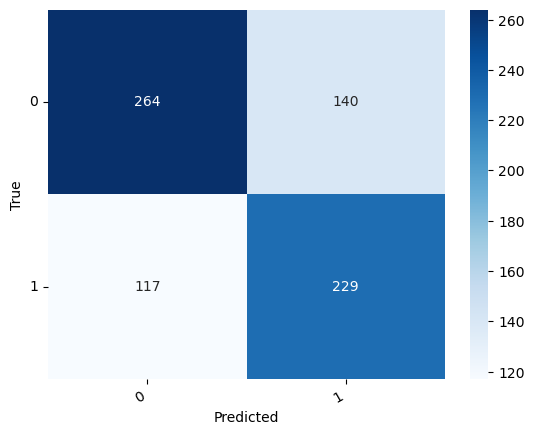

In [ ]:
def show_confusion_matrix(confusion_matrix):
    hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
    hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
    hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
    plt.ylabel('True')
    plt.xlabel('Predicted');

cm = confusion_matrix(y_test_afr, y_pred_afr)
df_cm = pd.DataFrame(cm, index=[0,1], columns=[0,1])
show_confusion_matrix(df_cm)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_afr, y_pred_afr, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.69      0.65      0.67       404
           1       0.62      0.66      0.64       346

    accuracy                           0.66       750
   macro avg       0.66      0.66      0.66       750
weighted avg       0.66      0.66      0.66       750



### European to Asian

In [ ]:
y_pred_asn = clf_eur.predict(X_test_asn)

In [ ]:
print('Accuracy score: ', accuracy_score(y_test_asn, y_pred_asn))

Accuracy score:  0.6253333333333333


In [ ]:
dict_acc['eur_asn'] =  accuracy_score(y_test_asn, y_pred_asn)

In [ ]:
from sklearn.metrics import roc_auc_score
print('ROC AUC score: ', roc_auc_score(y_test_asn, clf_eur.predict_proba(X_test_asn)[:, 1]))

ROC AUC score:  0.6670128983146106


In [ ]:
dict_roc['eur_asn'] = roc_auc_score(y_test_asn, clf_eur.predict_proba(X_test_asn)[:, 1])

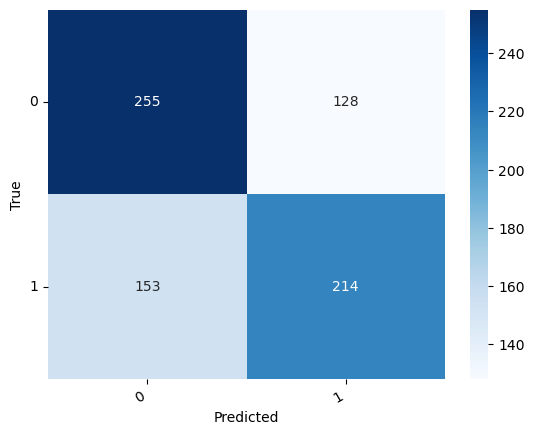

In [ ]:
def show_confusion_matrix(confusion_matrix):
    hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
    hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
    hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
    plt.ylabel('True')
    plt.xlabel('Predicted');

cm = confusion_matrix(y_test_asn, y_pred_asn)
df_cm = pd.DataFrame(cm, index=[0,1], columns=[0,1])
show_confusion_matrix(df_cm)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_asn, y_pred_asn, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.62      0.67      0.64       383
           1       0.63      0.58      0.60       367

    accuracy                           0.63       750
   macro avg       0.63      0.62      0.62       750
weighted avg       0.63      0.63      0.62       750



### African to African

In [ ]:
from sklearn.linear_model import LogisticRegression

clf_afr = LogisticRegression(random_state=0).fit(X_afr, y_afr)
y_pred_afr = clf_afr.predict(X_test_afr)

In [ ]:
print('Accuracy score: ', accuracy_score(y_test_afr, y_pred_afr))

Accuracy score:  0.6493333333333333


In [ ]:
dict_acc['afr_afr'] =  accuracy_score(y_test_afr, y_pred_afr)

In [ ]:
from sklearn.metrics import roc_auc_score
print('ROC AUC score: ', roc_auc_score(y_test_afr, clf_afr.predict_proba(X_test_afr)[:, 1]))

ROC AUC score:  0.6859583357179648


In [ ]:
dict_roc['afr_afr'] = roc_auc_score(y_test_afr, clf_afr.predict_proba(X_test_afr)[:, 1])

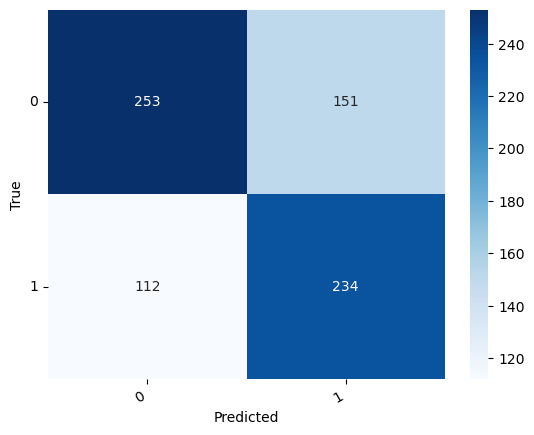

In [ ]:
def show_confusion_matrix(confusion_matrix):
    hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
    hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
    hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
    plt.ylabel('True')
    plt.xlabel('Predicted');

cm = confusion_matrix(y_test_afr, y_pred_afr)
df_cm = pd.DataFrame(cm, index=[0,1], columns=[0,1])
show_confusion_matrix(df_cm)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_afr, y_pred_afr, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.69      0.63      0.66       404
           1       0.61      0.68      0.64       346

    accuracy                           0.65       750
   macro avg       0.65      0.65      0.65       750
weighted avg       0.65      0.65      0.65       750



### African to European

In [ ]:
y_pred_eur = clf_afr.predict(X_test_eur)

In [ ]:
print('Accuracy score: ', accuracy_score(y_test_eur, y_pred_eur))

Accuracy score:  0.6213333333333333


In [ ]:
dict_acc['afr_eur'] =  accuracy_score(y_test_eur, y_pred_eur)

In [ ]:
from sklearn.metrics import roc_auc_score
print('ROC AUC score: ', roc_auc_score(y_test_eur, clf_afr.predict_proba(X_test_eur)[:, 1]))

ROC AUC score:  0.6722403741431225


In [ ]:
dict_roc['afr_eur'] = roc_auc_score(y_test_eur, clf_afr.predict_proba(X_test_eur)[:, 1])

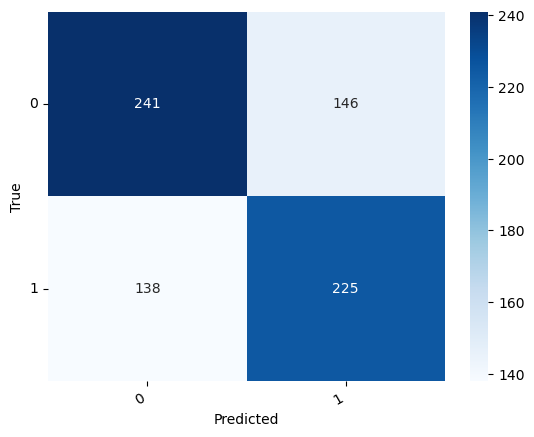

In [ ]:
def show_confusion_matrix(confusion_matrix):
    hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
    hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
    hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
    plt.ylabel('True')
    plt.xlabel('Predicted');

cm = confusion_matrix(y_test_eur, y_pred_eur)
df_cm = pd.DataFrame(cm, index=[0,1], columns=[0,1])
show_confusion_matrix(df_cm)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_eur, y_pred_eur, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.64      0.62      0.63       387
           1       0.61      0.62      0.61       363

    accuracy                           0.62       750
   macro avg       0.62      0.62      0.62       750
weighted avg       0.62      0.62      0.62       750



### African to Asian

In [ ]:
y_pred_asn = clf_afr.predict(X_test_asn)

In [ ]:
print('Accuracy score: ', accuracy_score(y_test_asn, y_pred_asn))

Accuracy score:  0.6253333333333333


In [ ]:
dict_acc['afr_asn'] =  accuracy_score(y_test_asn, y_pred_asn)

In [ ]:
from sklearn.metrics import roc_auc_score
print('ROC AUC score: ', roc_auc_score(y_test_asn, clf_afr.predict_proba(X_test_asn)[:, 1]))

ROC AUC score:  0.6591088566529834


In [ ]:
dict_roc['afr_asn'] = roc_auc_score(y_test_asn, clf_afr.predict_proba(X_test_asn)[:, 1])

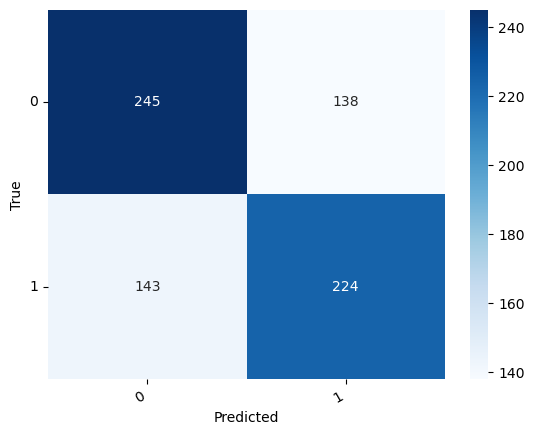

In [ ]:
def show_confusion_matrix(confusion_matrix):
    hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
    hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
    hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
    plt.ylabel('True')
    plt.xlabel('Predicted');

cm = confusion_matrix(y_test_asn, y_pred_asn)
df_cm = pd.DataFrame(cm, index=[0,1], columns=[0,1])
show_confusion_matrix(df_cm)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_asn, y_pred_asn, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.63      0.64      0.64       383
           1       0.62      0.61      0.61       367

    accuracy                           0.63       750
   macro avg       0.63      0.63      0.63       750
weighted avg       0.63      0.63      0.63       750



### Asian to Asian

In [ ]:
from sklearn.linear_model import LogisticRegression

clf_asn = LogisticRegression(random_state=0).fit(X_asn, y_asn)
y_pred_asn = clf_asn.predict(X_test_asn)

In [ ]:
print('Accuracy score: ', accuracy_score(y_test_asn, y_pred_asn))

Accuracy score:  0.608


In [ ]:
dict_acc['asn_asn'] =  accuracy_score(y_test_asn, y_pred_asn)

In [ ]:
from sklearn.metrics import roc_auc_score
print('ROC AUC score: ', roc_auc_score(y_test_asn, clf_asn.predict_proba(X_test_asn)[:, 1]))

ROC AUC score:  0.6525707699859847


In [ ]:
dict_roc['asn_asn'] = roc_auc_score(y_test_asn, clf_asn.predict_proba(X_test_asn)[:, 1])

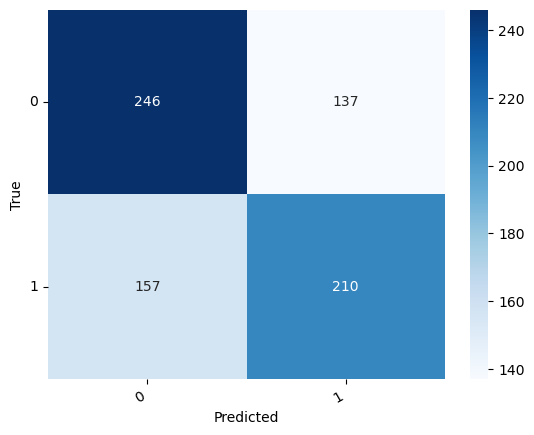

In [ ]:
def show_confusion_matrix(confusion_matrix):
    hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
    hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
    hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
    plt.ylabel('True')
    plt.xlabel('Predicted');

cm = confusion_matrix(y_test_asn, y_pred_asn)
df_cm = pd.DataFrame(cm, index=[0,1], columns=[0,1])
show_confusion_matrix(df_cm)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_asn, y_pred_asn, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.61      0.64      0.63       383
           1       0.61      0.57      0.59       367

    accuracy                           0.61       750
   macro avg       0.61      0.61      0.61       750
weighted avg       0.61      0.61      0.61       750



### Asian to European

In [ ]:
y_pred_eur = clf_asn.predict(X_test_eur)

In [ ]:
print('Accuracy score: ', accuracy_score(y_test_eur, y_pred_eur))

Accuracy score:  0.6173333333333333


In [ ]:
dict_acc['asn_eur'] =  accuracy_score(y_test_eur, y_pred_eur)

In [ ]:
from sklearn.metrics import roc_auc_score
print('ROC AUC score: ', roc_auc_score(y_test_eur, clf_asn.predict_proba(X_test_eur)[:, 1]))

ROC AUC score:  0.6731159373865505


In [ ]:
dict_roc['asn_eur'] = roc_auc_score(y_test_eur, clf_asn.predict_proba(X_test_eur)[:, 1])

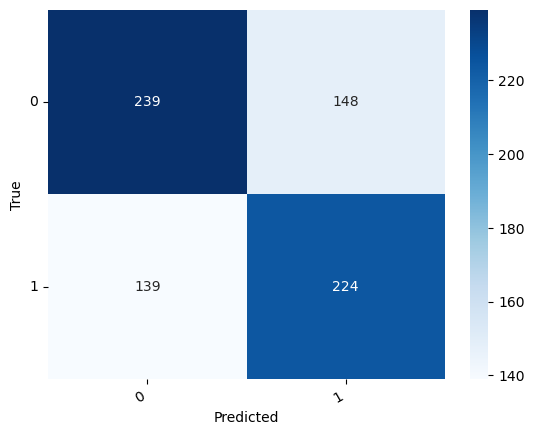

In [ ]:
def show_confusion_matrix(confusion_matrix):
    hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
    hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
    hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
    plt.ylabel('True')
    plt.xlabel('Predicted');

cm = confusion_matrix(y_test_eur, y_pred_eur)
df_cm = pd.DataFrame(cm, index=[0,1], columns=[0,1])
show_confusion_matrix(df_cm)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_eur, y_pred_eur, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.63      0.62      0.62       387
           1       0.60      0.62      0.61       363

    accuracy                           0.62       750
   macro avg       0.62      0.62      0.62       750
weighted avg       0.62      0.62      0.62       750



### Asian to African

In [ ]:
y_pred_afr = clf_asn.predict(X_test_afr)

In [ ]:
print('Accuracy score: ', accuracy_score(y_test_afr, y_pred_afr))

Accuracy score:  0.6573333333333333


In [ ]:
dict_acc['asn_afr'] =  accuracy_score(y_test_afr, y_pred_afr)

In [ ]:
from sklearn.metrics import roc_auc_score
print('ROC AUC score: ', roc_auc_score(y_test_afr, clf_asn.predict_proba(X_test_afr)[:, 1]))

ROC AUC score:  0.7070265552566818


In [ ]:
dict_roc['asn_afr'] = roc_auc_score(y_test_afr, clf_asn.predict_proba(X_test_afr)[:, 1])

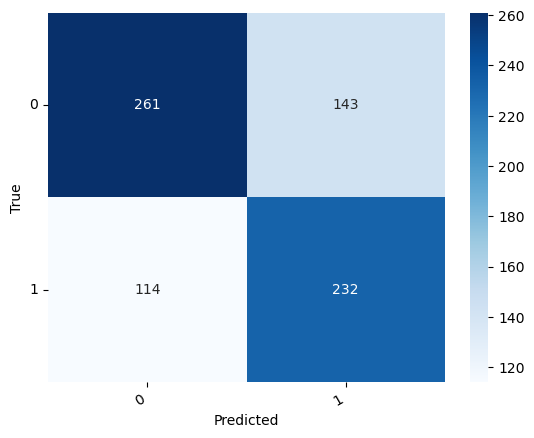

In [ ]:
def show_confusion_matrix(confusion_matrix):
    hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
    hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
    hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
    plt.ylabel('True')
    plt.xlabel('Predicted');

cm = confusion_matrix(y_test_afr, y_pred_afr)
df_cm = pd.DataFrame(cm, index=[0,1], columns=[0,1])
show_confusion_matrix(df_cm)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_afr, y_pred_afr, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.70      0.65      0.67       404
           1       0.62      0.67      0.64       346

    accuracy                           0.66       750
   macro avg       0.66      0.66      0.66       750
weighted avg       0.66      0.66      0.66       750



In [ ]:
metrics = []
metrics.append(dict_acc)
metrics.append(dict_roc)

In [ ]:
metrics = pd.DataFrame(metrics)
metrics_onetoone = metrics.T.rename(columns={0:'Accuracy', 1:'ROC AUC'})

## Many-to-one

In [ ]:
main_df_train = pd.concat([final_train_eur, final_train_afr, final_train_asn])

In [ ]:
main_df_test = pd.concat([final_test_eur, final_test_afr, final_test_asn])

In [ ]:
X_train = main_df_train.drop(['target'], axis=1)
y_train = main_df_train.target
X_test = main_df_test.drop(['target'], axis=1)
y_test = main_df_test.target

In [ ]:
from sklearn.linear_model import LogisticRegression

main_clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = main_clf.predict(X_test)

In [ ]:
print('Accuracy score: ', accuracy_score(y_test, y_pred))

Accuracy score:  0.6417777777777778


In [ ]:
print('ROC AUC score: ', roc_auc_score(y_test, clf_asn.predict_proba(X_test)[:, 1]))

ROC AUC score:  0.6771320842542574


### Many to European

In [ ]:
dict_acc_main = {}
dict_roc_main = {}

In [ ]:
y_pred_eur = main_clf.predict(X_test_eur)

In [ ]:
print('Accuracy score: ', accuracy_score(y_test_eur, y_pred_eur))

Accuracy score:  0.6293333333333333


In [ ]:
dict_acc_main['all_eur'] = accuracy_score(y_test_eur, y_pred_eur)

In [ ]:
print('ROC AUC score: ', roc_auc_score(y_test_eur, main_clf.predict_proba(X_test_eur)[:, 1]))

ROC AUC score:  0.6695496188096611


In [ ]:
dict_roc_main['all_eur'] = roc_auc_score(y_test_eur, main_clf.predict_proba(X_test_eur)[:, 1])

### Many to African

In [ ]:
y_pred_afr = main_clf.predict(X_test_afr)

In [ ]:
print('Accuracy score: ', accuracy_score(y_test_afr, y_pred_afr))

Accuracy score:  0.6666666666666666


In [ ]:
dict_acc_main['all_afr'] = accuracy_score(y_test_afr, y_pred_afr)

In [ ]:
print('ROC AUC score: ', roc_auc_score(y_test_afr, main_clf.predict_proba(X_test_afr)[:, 1]))

ROC AUC score:  0.7022119842042007


In [ ]:
dict_roc_main['all_afr'] = roc_auc_score(y_test_afr, main_clf.predict_proba(X_test_afr)[:, 1])

### Many to Asian

In [ ]:
y_pred_asn = main_clf.predict(X_test_asn)

In [ ]:
print('Accuracy score: ', accuracy_score(y_test_asn, y_pred_asn))

Accuracy score:  0.6293333333333333


In [ ]:
dict_acc_main['all_asn'] = accuracy_score(y_test_asn, y_pred_asn)

In [ ]:
print('ROC AUC score: ', roc_auc_score(y_test_asn, main_clf.predict_proba(X_test_asn)[:, 1]))

ROC AUC score:  0.6616771366168425


In [ ]:
dict_roc_main['all_asn'] = roc_auc_score(y_test_asn, main_clf.predict_proba(X_test_asn)[:, 1])

In [ ]:
metrics = []
metrics.append(dict_acc_main)
metrics.append(dict_roc_main)

In [ ]:
metrics = pd.DataFrame(metrics)
metrics_manytoone = metrics.T.rename(columns={0:'Accuracy', 1:'ROC AUC'})

In [ ]:
metrics_onetoone

,Accuracy,ROC AUC
eur_eur,0.617333,0.658046
eur_afr,0.657333,0.705918
eur_asn,0.625333,0.667013
afr_afr,0.649333,0.685958
afr_eur,0.621333,0.672240
afr_asn,0.625333,0.659109
asn_asn,0.608000,0.652571
asn_eur,0.617333,0.673116
asn_afr,0.657333,0.707027


In [ ]:
metrics_manytoone

,Accuracy,ROC AUC
all_eur,0.629333,0.669550
all_afr,0.666667,0.702212
all_asn,0.629333,0.661677
